In [45]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
# city_data.head()
ride_data = pd.read_csv(ride_data_to_load)
ride_data.head()

# Combine the data into a single dataset
city_ride_data = pd.merge(ride_data,city_data,on='city')
city_ride_data.head()
# Display the data table for preview


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

In [46]:
# Obtain the x and y coordinates for each of the three city types
city_types = city_ride_data.type.unique()
# city_types
# array(['Urban', 'Suburban', 'Rural'], dtype=object)

# dataframes for each city type


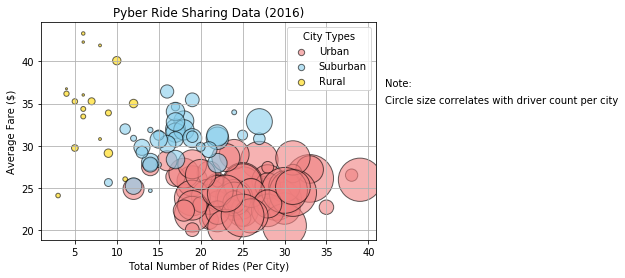

In [47]:
# Could use a for loop with city_types.len()
# urban = city_ride.loc[city_ride['type'] == city_types[0],:]
# suburban = city_ride.loc[city_ride['type'] == city_types[1],:]
# rural = city_ride.loc[city_ride['type'] == city_types[2],:]
aggregation = { 
     'fare': 'mean' ,
     'ride_id': 'nunique',
     'driver_count': 'sum'
}
urban = city_ride_data[city_ride_data.type == 'Urban'].groupby(['city','type']).agg(aggregation)
suburban = city_ride_data[city_ride_data.type == 'Suburban'].groupby(['city','type']).agg(aggregation)
rural = city_ride_data[city_ride_data.type == 'Rural'].groupby(['city','type']).agg(aggregation)

# arrays for each city type dataframe
urban_rides = urban['ride_id']
urban_fares = urban['fare']
urban_drivers = urban['driver_count']
# urban_fares
suburban_rides = suburban['ride_id']
suburban_fares = suburban['fare']
suburban_drivers = suburban['driver_count']
# suburban_fares
rural_rides = rural['ride_id']
rural_fares = rural['fare']
rural_drivers = rural['driver_count']
# rural_fares

# Build the scatter plots for each city types
urban_scatter = plt.scatter(urban_rides,urban_fares, s=urban_drivers, c='lightcoral', marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.6, linewidths=None, verts=None, edgecolors='black',label=city_types[0])
suburban_scatter = plt.scatter(suburban_rides,suburban_fares, s=suburban_drivers, c='skyblue', marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.6, linewidths=None, verts=None, edgecolors='black',label=city_types[1])
rural_scatter = plt.scatter(rural_rides,rural_fares, s=rural_drivers, c='gold', marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.6, linewidths=None, verts=None, edgecolors='black',label=city_types[2])
# Incorporate the other graph properties
plt.xlabel('Total Number of Rides (Per City)', fontdict=None, labelpad=None)
plt.ylabel('Average Fare ($)', fontdict=None, labelpad=None)
plt.title('Pyber Ride Sharing Data (2016)', fontdict=None, loc='center', pad=None)
plt.grid(b=None, which='major', axis='both')

# Create a legend
legend=plt.legend(handles=[urban_scatter,suburban_scatter,rural_scatter],title='City Types',markerscale=0.2)
# change the size of the legend color boxes
legend.legendHandles[0]._sizes = legend.legendHandles[1]._sizes = legend.legendHandles[2]._sizes = [40] #compliments of Tommy
# Incorporate a text label regarding circle size
plt.text(42,37,"Note:")
plt.text(42,35,"Circle size correlates with driver count per city") #compliments of Tommy
# Save Figure
plt.savefig('pyber ride sharing data.png')

In [48]:
# Show plot
plt.show()

## Total Fares by City Type

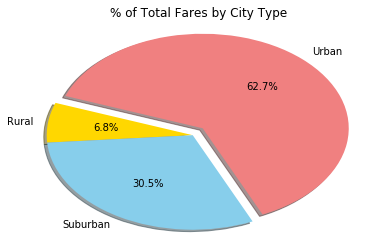

In [49]:
# Calculate Type Percents
aggregation = { 
     'fare': 'sum', 
}
total_fares_by_city_type = city_ride_data.groupby(['type']).agg(aggregation)
total_fares_by_city_type['type_copy'] = total_fares_by_city_type.index
total_types=total_fares_by_city_type.type_copy.tolist()
total_fares=total_fares_by_city_type.fare.tolist()
total_city_types=city_types
colors = ["gold","skyblue","lightcoral"]
explode = (0,0,0.1)


# Build Pie Chart
plt.pie(total_fares, explode=explode,labels=total_types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160)
plt.title('% of Total Fares by City Type', fontdict=None, loc='center', pad=None)

plt.axis('auto')

# Save Figure
plt.savefig('Total Fares by City Type.png')
# show graph
plt.show()

In [50]:
# help(plt.figaspect)

In [51]:
# Show Figure
plt.show()

## Total Rides by City Type

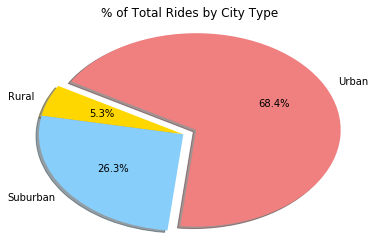

In [52]:
# Calculate Type Percents
aggregation = { 
     'ride_id': 'count', 
}
total_rides_by_city_type = city_ride_data.groupby(['type']).agg(aggregation)
total_rides_by_city_type['type_copy'] = total_rides_by_city_type.index
total_types=total_rides_by_city_type.type_copy.tolist()
total_rides=total_rides_by_city_type.ride_id.tolist()
total_city_types=city_types
colors = ["gold","lightskyblue","lightcoral"]
explode = (0,0,0.1)

# Build Pie Chart
plt.pie(total_rides, explode=explode,labels=total_types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)
plt.title('% of Total Rides by City Type', fontdict=None, loc='center', pad=None)

plt.axis('auto')

# Save Figure
plt.savefig('Total Rides by City Type.png')
# show graph
plt.show()


In [53]:
# Show Figure
plt.show()

## Total Drivers by City Type

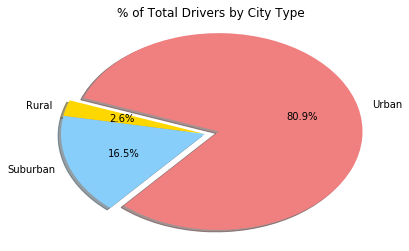

In [54]:
# Calculate Type Percents
aggregation = { 
     'driver_count': 'sum', 
}
total_drivers_by_city_type = city_data.groupby(['type']).agg(aggregation)
total_drivers_by_city_type['type_copy'] = total_drivers_by_city_type.index
total_types=total_drivers_by_city_type.type_copy.tolist()
total_drivers=total_drivers_by_city_type.driver_count.tolist()
total_city_types=city_types
colors = ["gold","lightskyblue","lightcoral"]
explode = (0,0,0.1)

# Build Pie Chart
plt.pie(total_drivers, explode=explode,labels=total_types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160)
plt.title('% of Total Drivers by City Type', fontdict=None, loc='center', pad=None)

plt.axis('auto')

# Save Figure
plt.savefig('Total Drivers by City Type.png')
# show graph
plt.show()


In [55]:
# Show Figure
plt.show()